# Parse Annotations

Join annotations and create dict of dataframes + car counts

In [1]:
from parsing_utils import *

annotations_dir = "../data/VEDAI1024/Annotations1024"
annotations_dict = parse_annotations_to_dict(annotations_dir)


In [2]:
annotations_dict['00000700']

{'annotation_df':      center_x    center_y  orientation  class_label  occluded  \
 0   58.681547  632.567510    -2.844031            1         1   
 1  953.272985  918.473923    -2.807891            1         1   
 
    fully_contained  corner1_x  corner1_y  corner2_x  corner2_y  corner3_x  \
 0                0         41         81         74         39        619   
 1                0        938        976        968        931        906   
 
    corner3_y  corner4_x  corner4_y  
 0        632        645        635  
 1        919        931        918  ,
 'df_length': 2}

# Parse Images

Extract images from Tarfiles

Keep commented - tars have been deleted but images are stored locally

In [3]:
# source_dir = '../raw_img/'
# dest_dir = '../data/VEDAI1024/images/'
# base_filename = 'Vehicules1024'  # Base name of the tar files
# combined_filename = 'Vehicules1024_combined.tar'  # Name for the combined tar file

# # Run the script
# handle_split_tars(source_dir, dest_dir, base_filename, combined_filename)

# Training a Model

Train SSD (Single Shot MultiBox Detector) - balance between performance and speed.

Original plan was using R-CNN but had disagreement with M1 MPS architecture for some reason

In [4]:
from PIL import ImageFile
from training_utils import *
from torchvision.models.detection import ssd300_vgg16

ImageFile.LOAD_TRUNCATED_IMAGES = True

In [5]:
dataset = VEDAI_Dataset(annotations_dict, '../data/VEDAI1024/images/Vehicules1024')

In [6]:
dataset.validate_dataset()

In [7]:
num_classes = 2
model = ssd300_vgg16(num_classes=num_classes)

In [8]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(device)

mps


/opt/miniconda3/envs/evs/lib/python3.10/site-packages/torchvision/models/detection/_utils.py:387: UserWarning: MPS: nonzero op is supported natively starting from macOS 13.0. Falling back on CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/mps/operations/Indexing.mm:335.)
  matches[below_low_threshold] = self.BELOW_LOW_THRESHOLD


Epoch [1/10]
Validation Loss: 1.321488857269287
Epoch [2/10]
Validation Loss: 1.2676042318344116
Epoch [3/10]
Validation Loss: 0.8549697995185852
Epoch [4/10]
Validation Loss: 0.8382211923599243
Epoch [5/10]
Validation Loss: 0.9538227319717407
Epoch [6/10]
Validation Loss: 1.124147891998291
Epoch [7/10]
Validation Loss: 1.0771968364715576
Epoch [8/10]
Validation Loss: 0.6760196685791016
Epoch [9/10]
Validation Loss: 0.9893598556518555
Epoch [10/10]
Validation Loss: 0.7854872941970825


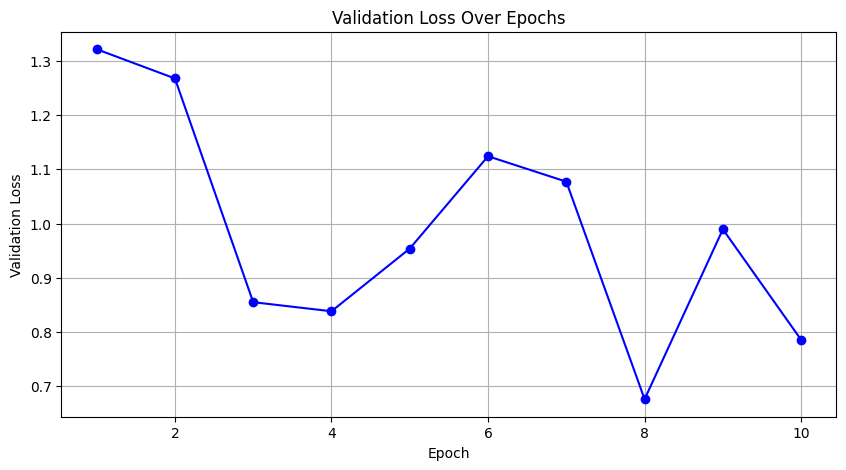

Training complete


In [9]:
train_model(model, dataset, device, epochs=10)